In [19]:
import pandas as pd

In [20]:
file_path = 'judge_tweet_product_company.csv'

# Our dataset contains special characters or a non-standard encoding.
# We solved this by reading the file using different encoding "ISO-8859-1"
data = pd.read_csv(file_path, encoding='ISO-8859-1')
data.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [21]:
# renaming columns for easy readibilty and beeter understanding
data.columns = ['Tweet', 'Product/Brand', 'Emotion' ]
data.head()

,Tweet,Product/Brand,Emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


## Data Cleaning

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          9092 non-null   object
 1   Product/Brand  3291 non-null   object
 2   Emotion        9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [23]:
# checking null values in tweets
data[data['Tweet'].isna()]


,Tweet,Product/Brand,Emotion
6,NaN,NaN,No emotion toward brand or product


In [24]:
# dropping null values in Tweet column
data = data.drop([6])
data[data['Tweet'].isna()]

,Tweet,Product/Brand,Emotion


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9092 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          9092 non-null   object
 1   Product/Brand  3291 non-null   object
 2   Emotion        9092 non-null   object
dtypes: object(3)
memory usage: 284.1+ KB


In [29]:
# dealing eith null values in Product/Brand
data[data['Product/Brand'].isna()].head(10)

,Tweet,Product/Brand,Emotion
5,@teachntech00 New iPad Apps For #SpeechTherapy...,NaN,No emotion toward brand or product
16,Holler Gram for iPad on the iTunes App Store -...,NaN,No emotion toward brand or product
32,"Attn: All #SXSW frineds, @mention Register fo...",NaN,No emotion toward brand or product
33,Anyone at #sxsw want to sell their old iPad?,NaN,No emotion toward brand or product
34,Anyone at #SXSW who bought the new iPad want ...,NaN,No emotion toward brand or product
35,At #sxsw. Oooh. RT @mention Google to Launch ...,NaN,No emotion toward brand or product
37,SPIN Play - a new concept in music discovery f...,NaN,No emotion toward brand or product
39,VatorNews - Google And Apple Force Print Media...,NaN,No emotion toward brand or product
41,HootSuite - HootSuite Mobile for #SXSW ~ Updat...,NaN,No emotion toward brand or product
42,Hey #SXSW - How long do you think it takes us ...,NaN,No emotion toward brand or product


These missing values can reveal:

Neutral Mentions: Many tweets might reference a brand or product but don't express emotion.
Potentially Irrelevant Entries: Tweets with general information or announcements without strong opinions or sentiment toward a product.

In [30]:
print("Value Counts of emotion of entire dataset \n")
display(data['Emotion'].value_counts())
print("\n\n Value Counts of emotion of dataset with no product attached")
display(data[data['Product/Brand'].isna()]['Emotion'].value_counts())

Value Counts of emotion of entire dataset 



Emotion
No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64



 Value Counts of emotion of dataset with no product attached


Emotion
No emotion toward brand or product    5297
Positive emotion                       306
I can't tell                           147
Negative emotion                        51
Name: count, dtype: int64

c:\Users\pcx\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


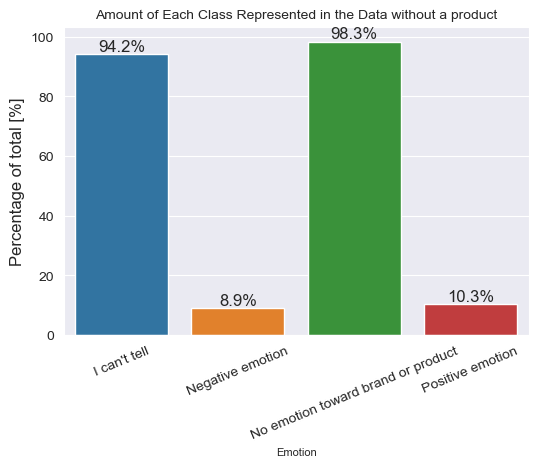

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

full_counts = data['Emotion'].value_counts()
subbed_counts = data[data['Product/Brand'].isna()]['Emotion'].value_counts()

#Displaying percentage of values for each class that come from subbed set
percentage_counts = subbed_counts/full_counts

plt.figure(figsize=(6,4))
sns.set_style('darkgrid')
bp = sns.barplot(x=list(percentage_counts.keys()), y= percentage_counts*100)

bp.set_ylabel('Percentage of total [%]', fontsize=12)
bp.set_xlabel('Emotion', fontsize=8)
bp.set_xticklabels(labels=list(percentage_counts.keys()), rotation=22.5)
bp.set_title("Amount of Each Class Represented in the Data without a product", fontsize=10)

for patch in bp.patches:
    x = patch.get_bbox().get_points()[:,0]
    y = patch.get_bbox().get_points()[1,1]
    bp.annotate("{:.1f}%".format(y), (x.mean(), y),\
            ha= 'center', va= 'bottom', fontsize= 'large') 

plt.show()

High Ambiguity: The majority (94.2%) of tweets fall into the "I can't tell" category, indicating significant ambiguity in detecting a clear emotion in most tweets.

Lack of Directed Emotion: A substantial 98.3% of the tweets do not target a brand or product with any emotion, which aligns with the title’s focus on non-product-related data.

Small Proportions for Clear Emotions: Negative and positive emotions are relatively low, with only 8.9% and 10.3%, respectively, suggesting that few tweets express a clearly identifiable emotion.

In [33]:
data['Product/Brand'].fillna('Unknown', inplace=True)

In [35]:
data.isna().sum()

Tweet            0
Product/Brand    0
Emotion          0
dtype: int64

In [36]:
# Cleaning emotion column
data['Emotion'].value_counts()

Emotion
No emotion toward brand or product    5388
Positive emotion                      2978
Negative emotion                       570
I can't tell                           156
Name: count, dtype: int64

In [38]:
# renaming emotions captured for better readability
emotion_dict = {'Positive emotion': 'Positive', 'Negative emotion': 'Negative', 'No emotion toward brand or product': 'Neutral', "I can't tell": 'Unknown'}
data['Emotion'] = data['Emotion'].map(emotion_dict)
data.head()



,Tweet,Product/Brand,Emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive


In [39]:
# checking for patterns to see if we can better emotion distribution
pd.set_option("display.max_colwidth", 300)
data[data['Emotion']=='Unknown']

,Tweet,Product/Brand,Emotion
90,Thanks to @mention for publishing the news of @mention new medical Apps at the #sxswi conf. blog {link} #sxsw #sxswh,Unknown,Unknown
102,ÛÏ@mention &quot;Apple has opened a pop-up store in Austin so the nerds in town for #SXSW can get their new iPads. {link} #wow,Unknown,Unknown
237,"Just what America needs. RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw",Unknown,Unknown
341,The queue at the Apple Store in Austin is FOUR blocks long. Crazy stuff! #sxsw,Unknown,Unknown
368,Hope it's better than wave RT @mention Buzz is: Google's previewing a social networking platform at #SXSW: {link},Unknown,Unknown
...,...,...,...
9020,It's funny watching a room full of people hold their iPad in the air to take a photo. Like a room full of tablets staring you down. #SXSW,Unknown,Unknown
9032,"@mention yeah, we have @mention , Google has nothing on us :) #SXSW",Unknown,Unknown
9037,"@mention Yes, the Google presentation was not exactly what I was expecting. #sxsw",Unknown,Unknown
9058,&quot;Do you know what Apple is really good at? Making you feel bad about your Xmas present!&quot; - Seth Meyers on iPad2 #sxsw #doyoureallyneedthat?,Unknown,Unknown


Most tweets appear to be neutral observations or announcements about events, new product releases, or other general topics without any clear positive or negative sentiment.

We note that the these sentiments do not align with our model development. Given the limited number of unknown sentiments, we shall proceed to drop them.



In [40]:
data = data[data['Emotion']!='Unknown']
data['Emotion'].value_counts()

Emotion
Neutral     5388
Positive    2978
Negative     570
Name: count, dtype: int64

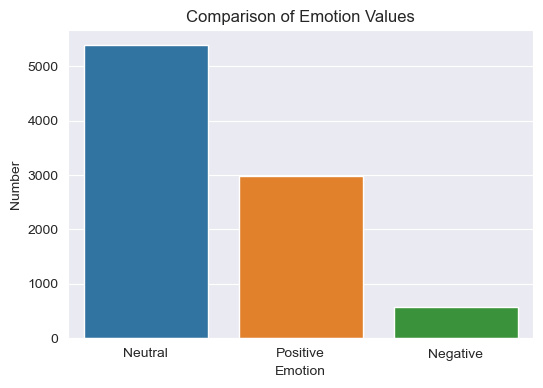

In [41]:
plt.figure(figsize=(6,4))
import seaborn as sns

comp = sns.countplot(data=data, x = 'Emotion', order = data['Emotion'].value_counts().index)
comp.set_title("Comparison of Emotion Values")
comp.set_ylabel("Number")
comp.set_xlabel('Emotion')
plt.show()

In [42]:
#Dealing with duplicates
len(data[data.duplicated()])


22

In [43]:
data[data.duplicated()]


,Tweet,Product/Brand,Emotion
468,"Before It Even Begins, Apple Wins #SXSW {link}",Apple,Positive
776,"Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw",Unknown,Neutral
2232,Marissa Mayer: Google Will Connect the Digital &amp; Physical Worlds Through Mobile - {link} #sxsw,Unknown,Neutral
2559,Counting down the days to #sxsw plus strong Canadian dollar means stock up on Apple gear,Apple,Positive
3950,Really enjoying the changes in Gowalla 3.0 for Android! Looking forward to seeing what else they &amp; Foursquare have up their sleeves at #SXSW,Android App,Positive
3962,"#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan",Android,Positive
4897,"Oh. My. God. The #SXSW app for iPad is pure, unadulterated awesome. It's easier to browse events on iPad than on the website!!!",iPad or iPhone App,Positive
5338,RT @mention ÷¼ GO BEYOND BORDERS! ÷_ {link} ã_ #edchat #musedchat #sxsw #sxswi #classical #newTwitter,Unknown,Neutral
5341,"RT @mention ÷¼ Happy Woman's Day! Make love, not fuss! ÷_ {link} ã_ #edchat #musedchat #sxsw #sxswi #classical #newTwitter",Unknown,Neutral
5881,"RT @mention Google to Launch Major New Social Network Called Circles, Possibly Today {link} #sxsw",Unknown,Neutral


In [44]:
data.drop_duplicates(keep='first', inplace = True)
data.info()

C:\Users\pcx\AppData\Local\Temp\ipykernel_22636\1977920170.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(keep='first', inplace = True)


<class 'pandas.core.frame.DataFrame'>
Index: 8914 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Tweet          8914 non-null   object
 1   Product/Brand  8914 non-null   object
 2   Emotion        8914 non-null   object
dtypes: object(3)
memory usage: 278.6+ KB
